In [2]:
import cv2
import os

# Function to read images from a folder
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

In [3]:
flavia_dataset_path = r'C:\Users\samih\OneDrive\Documents\dip\Leaves'

# Read images from the Flavia dataset
flavia_images = read_images_from_folder(flavia_dataset_path)

# Now, 'flavia_images' and 'plantclef_images' contain the images from their respective datasets

In [4]:

import numpy as np

# Function to calculate greenness difference and perform binarization
def calculate_greenness_and_binarize(images, threshold):
    binarized_images = []
    for img in images:
        # Split the image into RGB channels
        blue_channel, green_channel, red_channel = cv2.split(img)

        # Calculate greenness difference
        green_difference = green_channel - (red_channel + blue_channel) / 2

        # Binarize based on the threshold
        binarized_image = np.zeros_like(green_channel)
        binarized_image[green_difference > threshold] = 255

        binarized_images.append(binarized_image)

    return binarized_images



In [8]:
# Set the threshold for binarization
threshold_value = 100

# Calculate greenness and perform binarization for Flavia dataset
flavia_binarized_images = calculate_greenness_and_binarize(flavia_images, threshold_value)

# Function to save images to disk
def save_images(images, folder_path):
    for i, img in enumerate(images):
        file_path = os.path.join(folder_path, f'binarized_image_{i+1}.png')
        cv2.imwrite(file_path, img)

# Save binarized images for Flavia dataset
save_images(flavia_binarized_images, folder_path=r'C:\Users\samih\OneDrive\Documents\dip\project\bflavia')



In [26]:
plantclef_dataset_path = r'C:\Users\samih\OneDrive\Documents\dip\PlantCLEF_Subset\train\daisy'
# Read images from the PlantCLEF dataset
plantclef_images = read_images_from_folder(plantclef_dataset_path)


In [ ]:

       
 # Set the threshold for binarization
threshold_value = 55

# Calculate greenness and perform binarization for PlantCLEF dataset
plantclef_binarized_images = calculate_greenness_and_binarize(plantclef_images, threshold_value)

# Function to save images to disk
def save_images(images, folder_path):
    for i, img in enumerate(images):
        file_path = os.path.join(folder_path, f'binarized_image_{i+1}.png')
        cv2.imwrite(file_path, img)

# Save binarized images for PlantCLEF dataset
save_images(plantclef_binarized_images, folder_path=r'C:\Users\samih\OneDrive\Documents\dip\project\plantclefd')


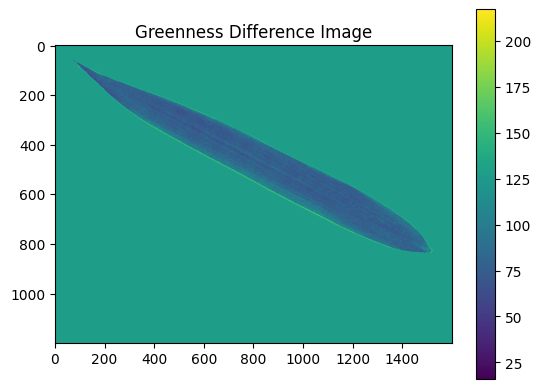

In [14]:
import matplotlib.pyplot as plt

# Display greenness difference image
green_difference_image = flavia_images[0][:, :, 1] - (flavia_images[0][:, :, 2] + flavia_images[0][:, :, 0]) / 2
plt.imshow(green_difference_image, cmap='viridis')  
plt.colorbar()
plt.title('Greenness Difference Image')
plt.show()


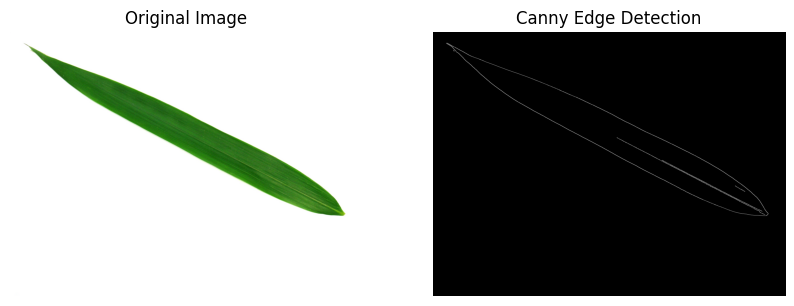

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for edge detection using Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detector
    edges = cv2.Canny(blurred, low_threshold, high_threshold)
    
    return edges

# Choose an image from the Flavia dataset
image_flavia = flavia_images[0]

# Set Canny edge detection thresholds
low_threshold = 50
high_threshold = 150

# Perform edge detection
edges_flavia = canny_edge_detection(image_flavia, low_threshold, high_threshold)

# Display the original image and the edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_flavia, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_flavia, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


In [17]:
import cv2
import numpy as np
import os

# Function for edge detection using Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detector
    edges = cv2.Canny(blurred, low_threshold, high_threshold)
    
    return edges

# Function to save images to a folder
def save_image(image, folder_path, filename):
    file_path = os.path.join(folder_path, filename)
    cv2.imwrite(file_path, image)

# Choose an image from the Flavia dataset
image_flavia = flavia_images[0]

# Set Canny edge detection thresholds
low_threshold = 50
high_threshold = 150

# Perform edge detection
edges_flavia = canny_edge_detection(image_flavia, low_threshold, high_threshold)

# Create a folder to save the results
output_folder_flavia = 'path_to_save/edges_flavia'
os.makedirs(output_folder_flavia, exist_ok=True)

# Save the original image and the edges in the folder
save_image(image_flavia, output_folder_flavia, 'original_image_flavia.jpg')
save_image(edges_flavia, output_folder_flavia, 'edges_flavia.jpg')


In [18]:
import cv2
import os

# Function for edge detection using Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, low_threshold, high_threshold)
    return edges

# Function to save images to a folder
def save_image(image, folder_path, filename):
    file_path = os.path.join(folder_path, filename)
    cv2.imwrite(file_path, image)

# Set Canny edge detection thresholds
low_threshold = 50
high_threshold = 150

# Create a folder to save the results
output_folder_flavia = 'path_to_save/edges_flavia'
os.makedirs(output_folder_flavia, exist_ok=True)

# Iterate through all images in the Flavia dataset
for i, image_flavia in enumerate(flavia_images):
    # Perform Canny edge detection
    edges_flavia = canny_edge_detection(image_flavia, low_threshold, high_threshold)

    # Save the original image and the edges in the folder
    save_image(image_flavia, output_folder_flavia, f'original_image_{i+1}.jpg')
    save_image(edges_flavia, output_folder_flavia, f'edges_{i+1}.jpg')


In [19]:
import cv2
import os

# Function for edge detection using Sobel
def sobel_edge_detection(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel edge detector
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute the magnitude of the gradient
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Normalize the magnitude to the range [0, 255]
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    
    return magnitude

# Function to save images to a folder
def save_image(image, folder_path, filename):
    file_path = os.path.join(folder_path, filename)
    cv2.imwrite(file_path, image)

# Create a folder to save the results
output_folder_flavia_sobel = 'path_to_save/edges_flavia_sobel'
os.makedirs(output_folder_flavia_sobel, exist_ok=True)

# Iterate through all images in the Flavia dataset
for i, image_flavia in enumerate(flavia_images):
    # Perform Sobel edge detection
    edges_flavia_sobel = sobel_edge_detection(image_flavia)

    # Save the original image and the edges in the folder
    save_image(image_flavia, output_folder_flavia_sobel, f'original_image_{i+1}.jpg')
    save_image(edges_flavia_sobel, output_folder_flavia_sobel, f'edges_sobel_{i+1}.jpg')


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to read images from a folder
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

dataset_folder_path = r'C:\Users\samih\OneDrive\Documents\dip\dip_project\Leaves'
flavia_images = read_images_from_folder(dataset_folder_path)

# Function for edge detection using Prewitt
def prewitt_edge_detection(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Define Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    # Apply Prewitt edge detection
    prewitt_x = cv2.filter2D(gray, cv2.CV_64F, kernel_x)
    prewitt_y = cv2.filter2D(gray, cv2.CV_64F, kernel_y)
    
    # Compute the magnitude of the gradient
    magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
    
    # Normalize the magnitude to the range [0, 255]
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    
    return magnitude

# Function to save images to a folder
def save_image(image, folder_path, filename):
    file_path = os.path.join(folder_path, filename)
    cv2.imwrite(file_path, image)

# Create a folder to save the results
output_folder_flavia_prewitt = 'path_to_saveprewitt/edges_flavia_prewitt'
os.makedirs(output_folder_flavia_prewitt, exist_ok=True)

# Iterate through all images in the Flavia dataset
for i, image_flavia in enumerate(flavia_images):
    # Perform Prewitt edge detection
    edges_flavia_prewitt = prewitt_edge_detection(image_flavia)

    # Save the original image and the edges in the folder
    save_image(image_flavia, output_folder_flavia_prewitt, f'original_image_{i+1}.jpg')
    save_image(edges_flavia_prewitt, output_folder_flavia_prewitt, f'edges_prewitt_{i+1}.jpg')


In [3]:
import cv2
import os
import numpy as np

# Function for edge detection using Laplacian of Gaussian (LoG)
def log_edge_detection(image, sigma):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), sigma)
    
    # Apply Laplacian operator
    log_image = cv2.Laplacian(blurred, cv2.CV_64F)
    
    # Compute the magnitude of the gradient
    magnitude = np.abs(log_image)
    
    # Normalize the magnitude to the range [0, 255]
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    
    return magnitude

# Function to save images to a folder
def save_image(image, folder_path, filename):
    file_path = os.path.join(folder_path, filename)
    cv2.imwrite(file_path, image)

# Create a folder to save the results
output_folder_flavia_log = 'path_to_savelog/edges_flavia_log'
os.makedirs(output_folder_flavia_log, exist_ok=True)

# Iterate through all images in the Flavia dataset
for i, image_flavia in enumerate(flavia_images):
    # Perform LoG edge detection with a specified sigma
    edges_flavia_log = log_edge_detection(image_flavia, sigma=1.5)

    # Save the original image and the edges in the folder
    save_image(image_flavia, output_folder_flavia_log, f'original_image_{i+1}.jpg')
    save_image(edges_flavia_log, output_folder_flavia_log, f'edges_log_{i+1}.jpg')


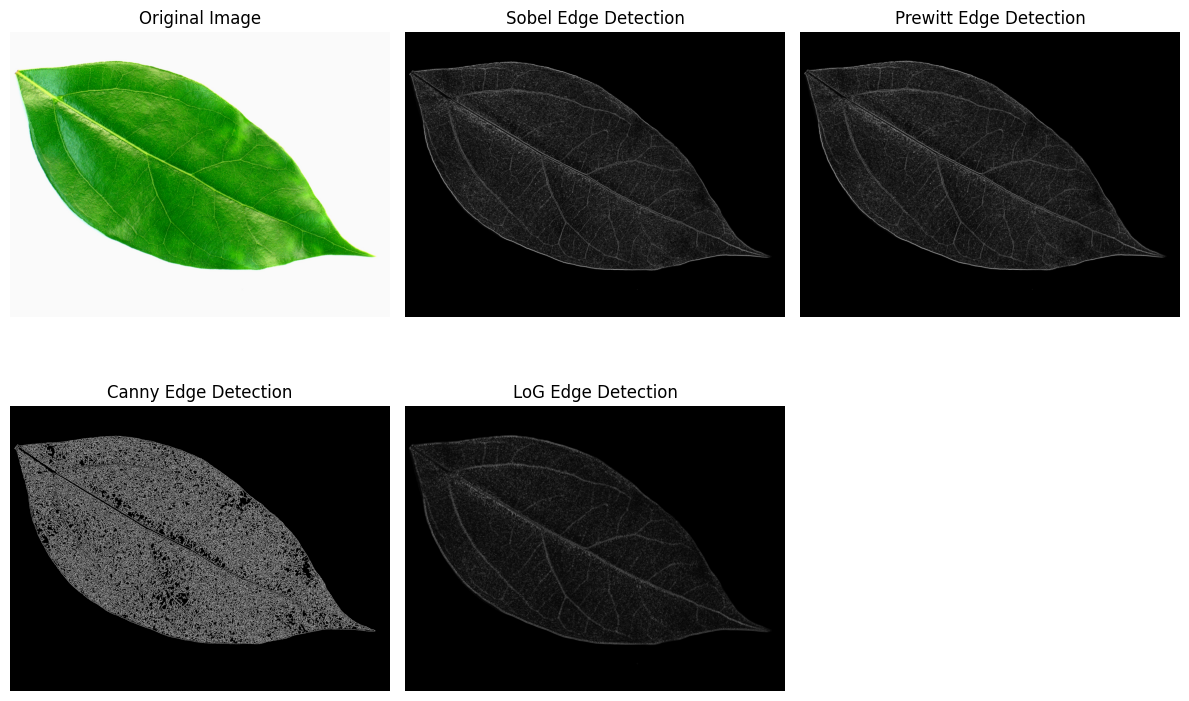

In [8]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to apply Sobel edge detection
def sobel_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    return magnitude

# Function to apply Prewitt edge detection
def prewitt_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_x = cv2.filter2D(gray, cv2.CV_64F, kernel_x)
    prewitt_y = cv2.filter2D(gray, cv2.CV_64F, kernel_y)
    magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    return magnitude

# Function to apply Canny edge detection
def canny_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

# Function to apply Laplacian of Gaussian (LoG) edge detection
def log_edge_detection(image, sigma):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), sigma)
    log_image = cv2.Laplacian(blurred, cv2.CV_64F)
    magnitude = np.abs(log_image)
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    return magnitude

# Read an example image from the Flavia dataset
example_image = flavia_images[830]

# Apply edge detection methods
edges_sobel = sobel_edge_detection(example_image)
edges_prewitt = prewitt_edge_detection(example_image)
edges_canny = canny_edge_detection(example_image)
edges_log = log_edge_detection(example_image, sigma=1.5)

# Visualize the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(edges_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(edges_log, cmap='gray')
plt.title('LoG Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


Image 1, Sobel PSNR: 37.04
Image 1, Prewitt PSNR: 37.02
Image 1, Canny PSNR: 36.98
Image 1, LoG PSNR: 37.05
Image 2, Sobel PSNR: 38.74
Image 2, Prewitt PSNR: 38.74
Image 2, Canny PSNR: 38.98
Image 2, LoG PSNR: 38.19
Image 3, Sobel PSNR: 40.03
Image 3, Prewitt PSNR: 40.02
Image 3, Canny PSNR: 40.02
Image 3, LoG PSNR: 39.91


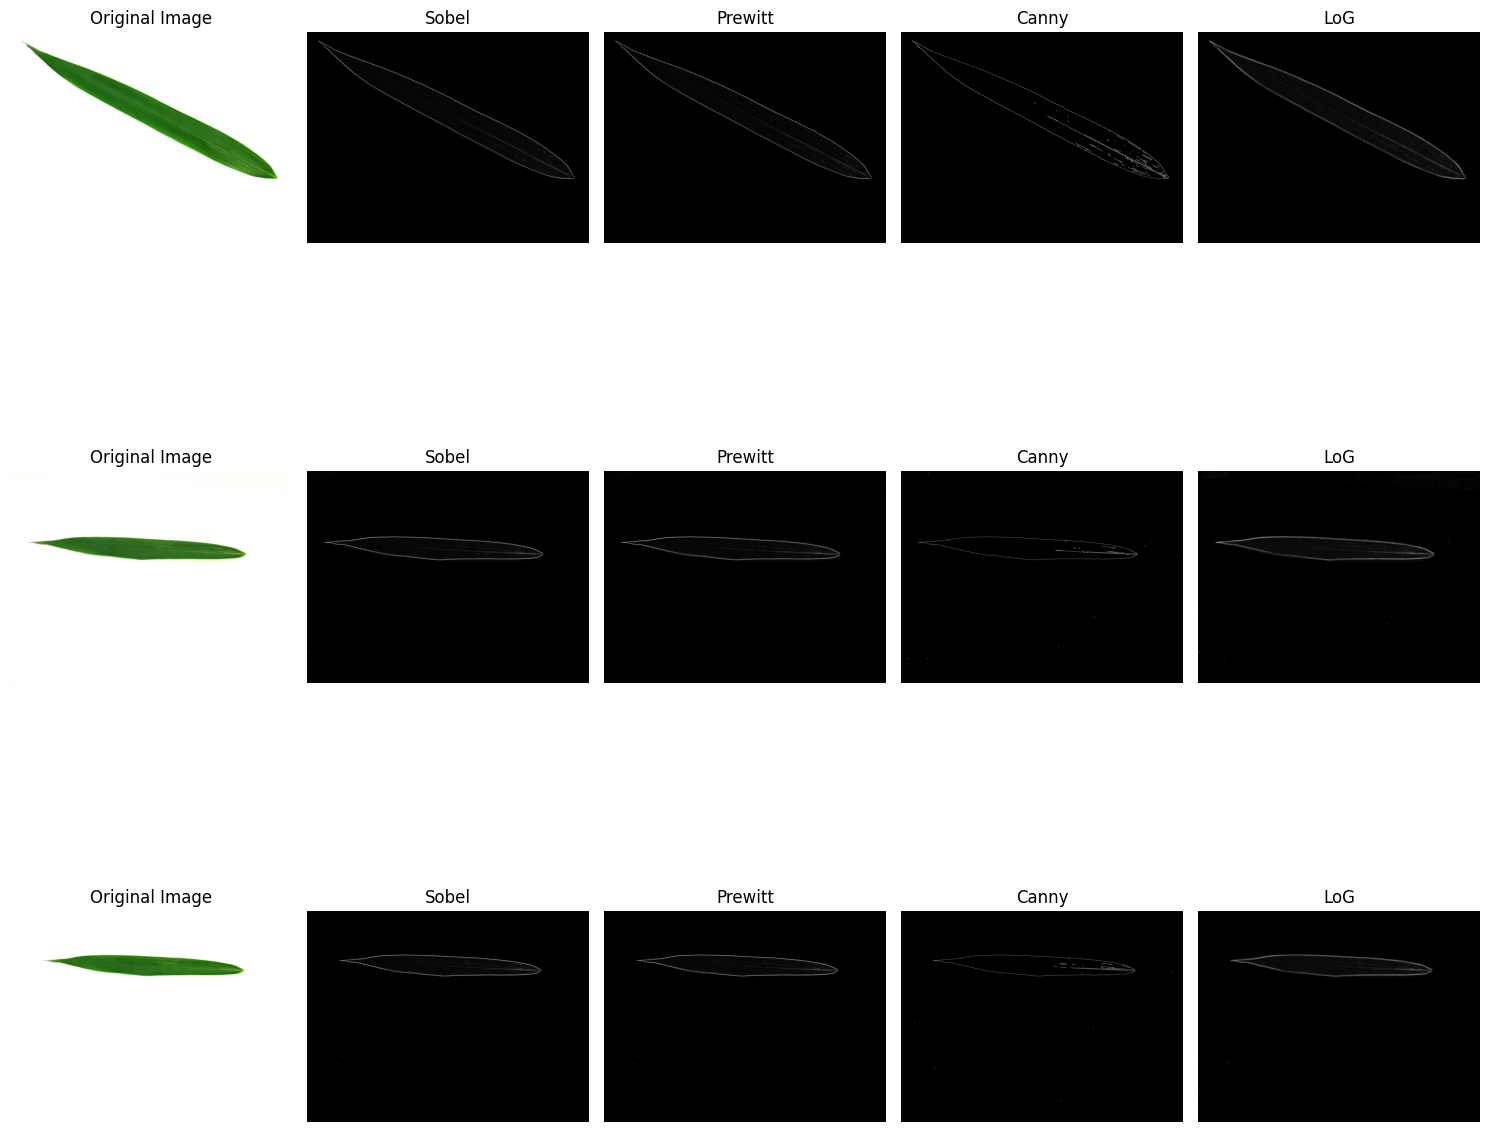

In [10]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate PSNR
def calculate_psnr(original, noisy):
    # Ensure both images have the same shape
    if original.shape != noisy.shape:
        noisy = cv2.cvtColor(noisy, cv2.COLOR_GRAY2RGB)

    mse = np.mean((original - noisy)**2)
    psnr = 20 * np.log10(255 / np.sqrt(mse))
    return psnr


# Function for side-by-side comparison
def compare_edge_detection(images, methods, titles):
    num_images = len(images)
    num_methods = len(methods)

    plt.figure(figsize=(15, 5 * num_images))

    for i, image in enumerate(images):
        # Display original image
        plt.subplot(num_images, num_methods + 1, i * (num_methods + 1) + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        for j, method in enumerate(methods):
            # Apply edge detection method
            edges = method(image)

            # Display the edges
            plt.subplot(num_images, num_methods + 1, i * (num_methods + 1) + j + 2)
            plt.imshow(edges, cmap='gray')
            plt.title(titles[j])
            plt.axis('off')

            # Optionally, calculate and print PSNR
            psnr = calculate_psnr(image, edges)
            print(f"Image {i + 1}, {titles[j]} PSNR: {psnr:.2f}")

    plt.tight_layout()
    plt.show()

# Choose edge detection methods and their corresponding titles
edge_methods = [sobel_edge_detection, prewitt_edge_detection, canny_edge_detection, lambda img: log_edge_detection(img, sigma=1.5)]
edge_titles = ['Sobel', 'Prewitt', 'Canny', 'LoG']

# Choose a subset of images for comparison (e.g., the first 3 images)
subset_images = flavia_images[:3]

# Perform the side-by-side comparison
compare_edge_detection(subset_images, edge_methods, edge_titles)


Image 1, Sobel PSNR: 30.12
Image 1, Prewitt PSNR: 30.13
Image 1, Canny PSNR: 30.45
Image 1, LoG PSNR: 30.18
Image 2, Sobel PSNR: 29.32
Image 2, Prewitt PSNR: 29.32
Image 2, Canny PSNR: 29.36
Image 2, LoG PSNR: 29.36
Image 3, Sobel PSNR: 32.03
Image 3, Prewitt PSNR: 31.98
Image 3, Canny PSNR: 32.30
Image 3, LoG PSNR: 31.90


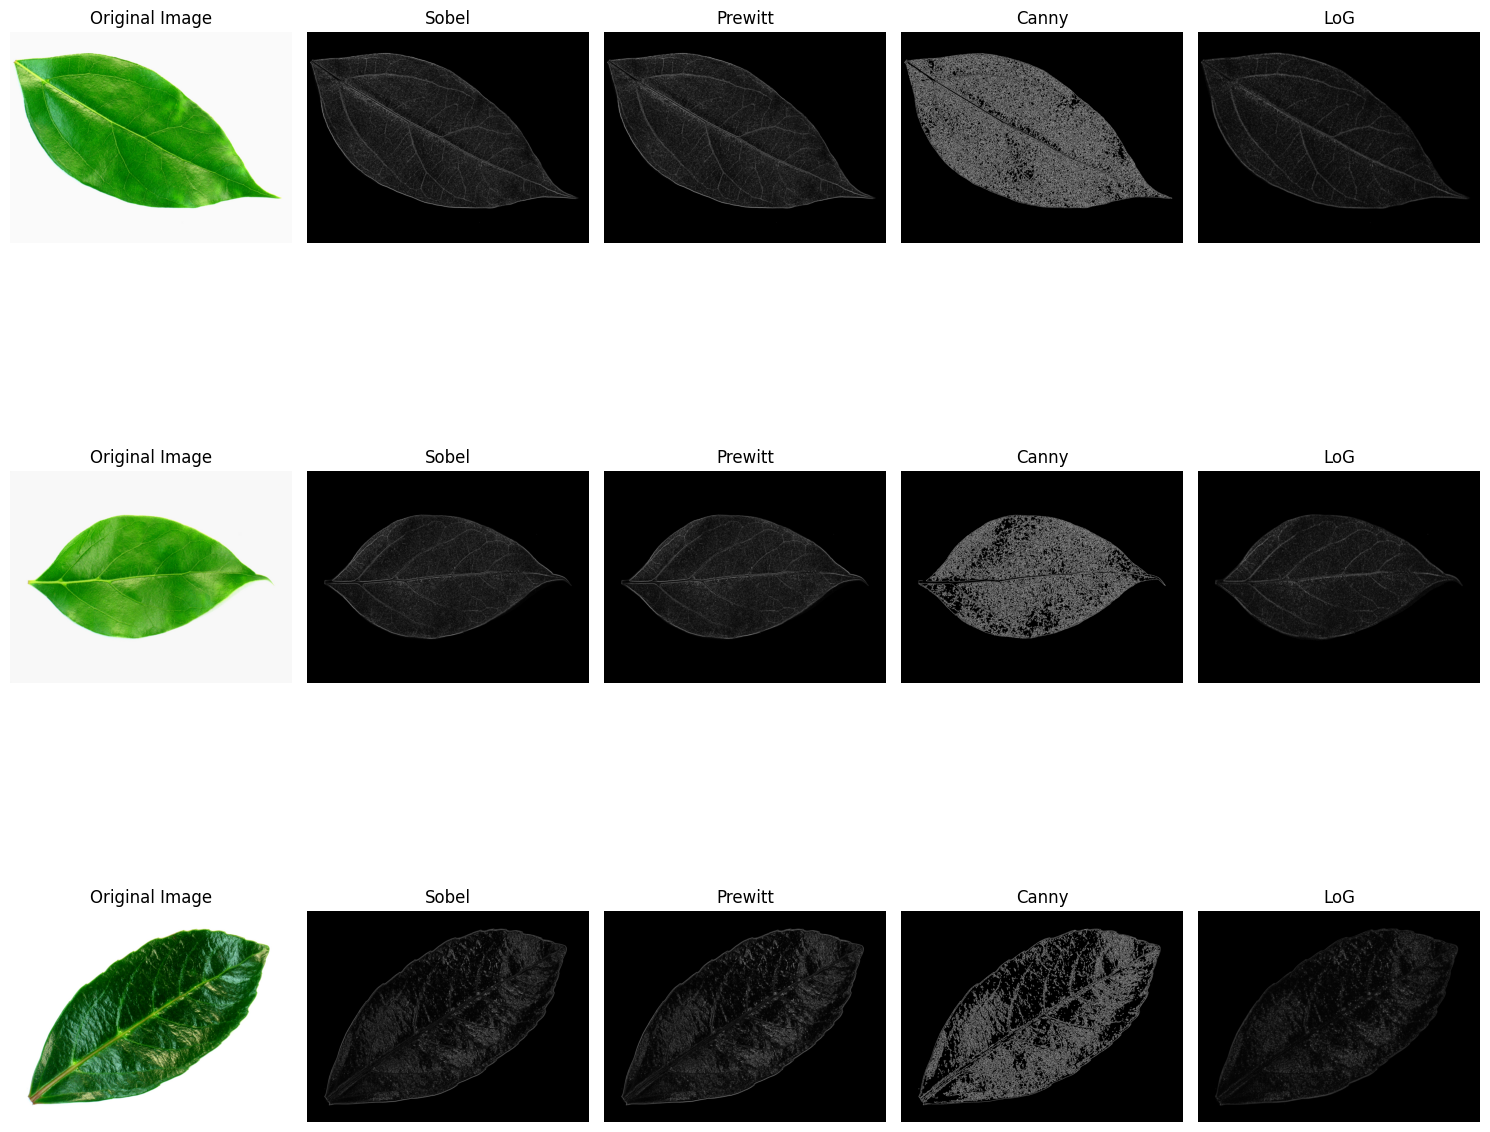

In [11]:
# Manually choose indices of images for comparison
selected_indices = [830, 800, 875]  

# Create a subset of images based on the selected indices
subset_images = [flavia_images[i] for i in selected_indices]

# Perform the side-by-side comparison
compare_edge_detection(subset_images, edge_methods, edge_titles)
